In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [5]:
cars = pd.read_csv("ToyotaCorolla - MLR.csv")
cars.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [7]:
cars.isna().sum()


,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

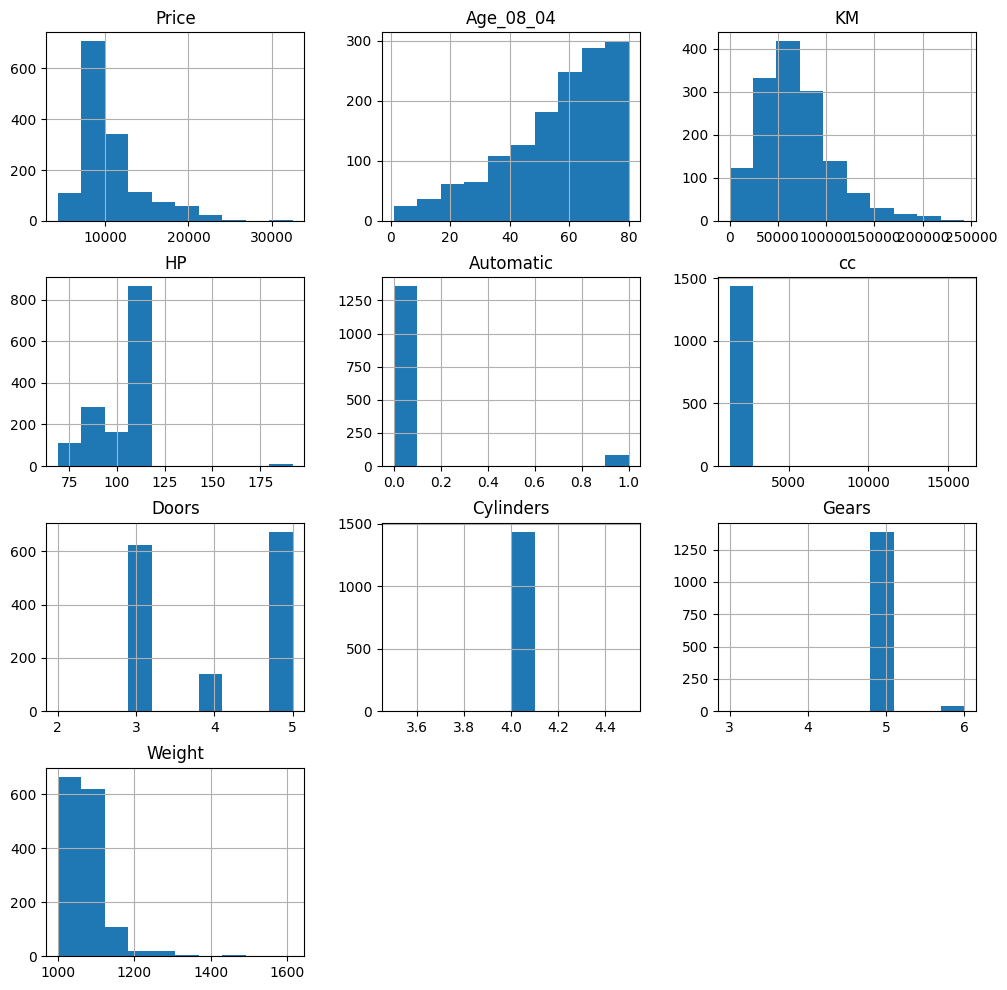

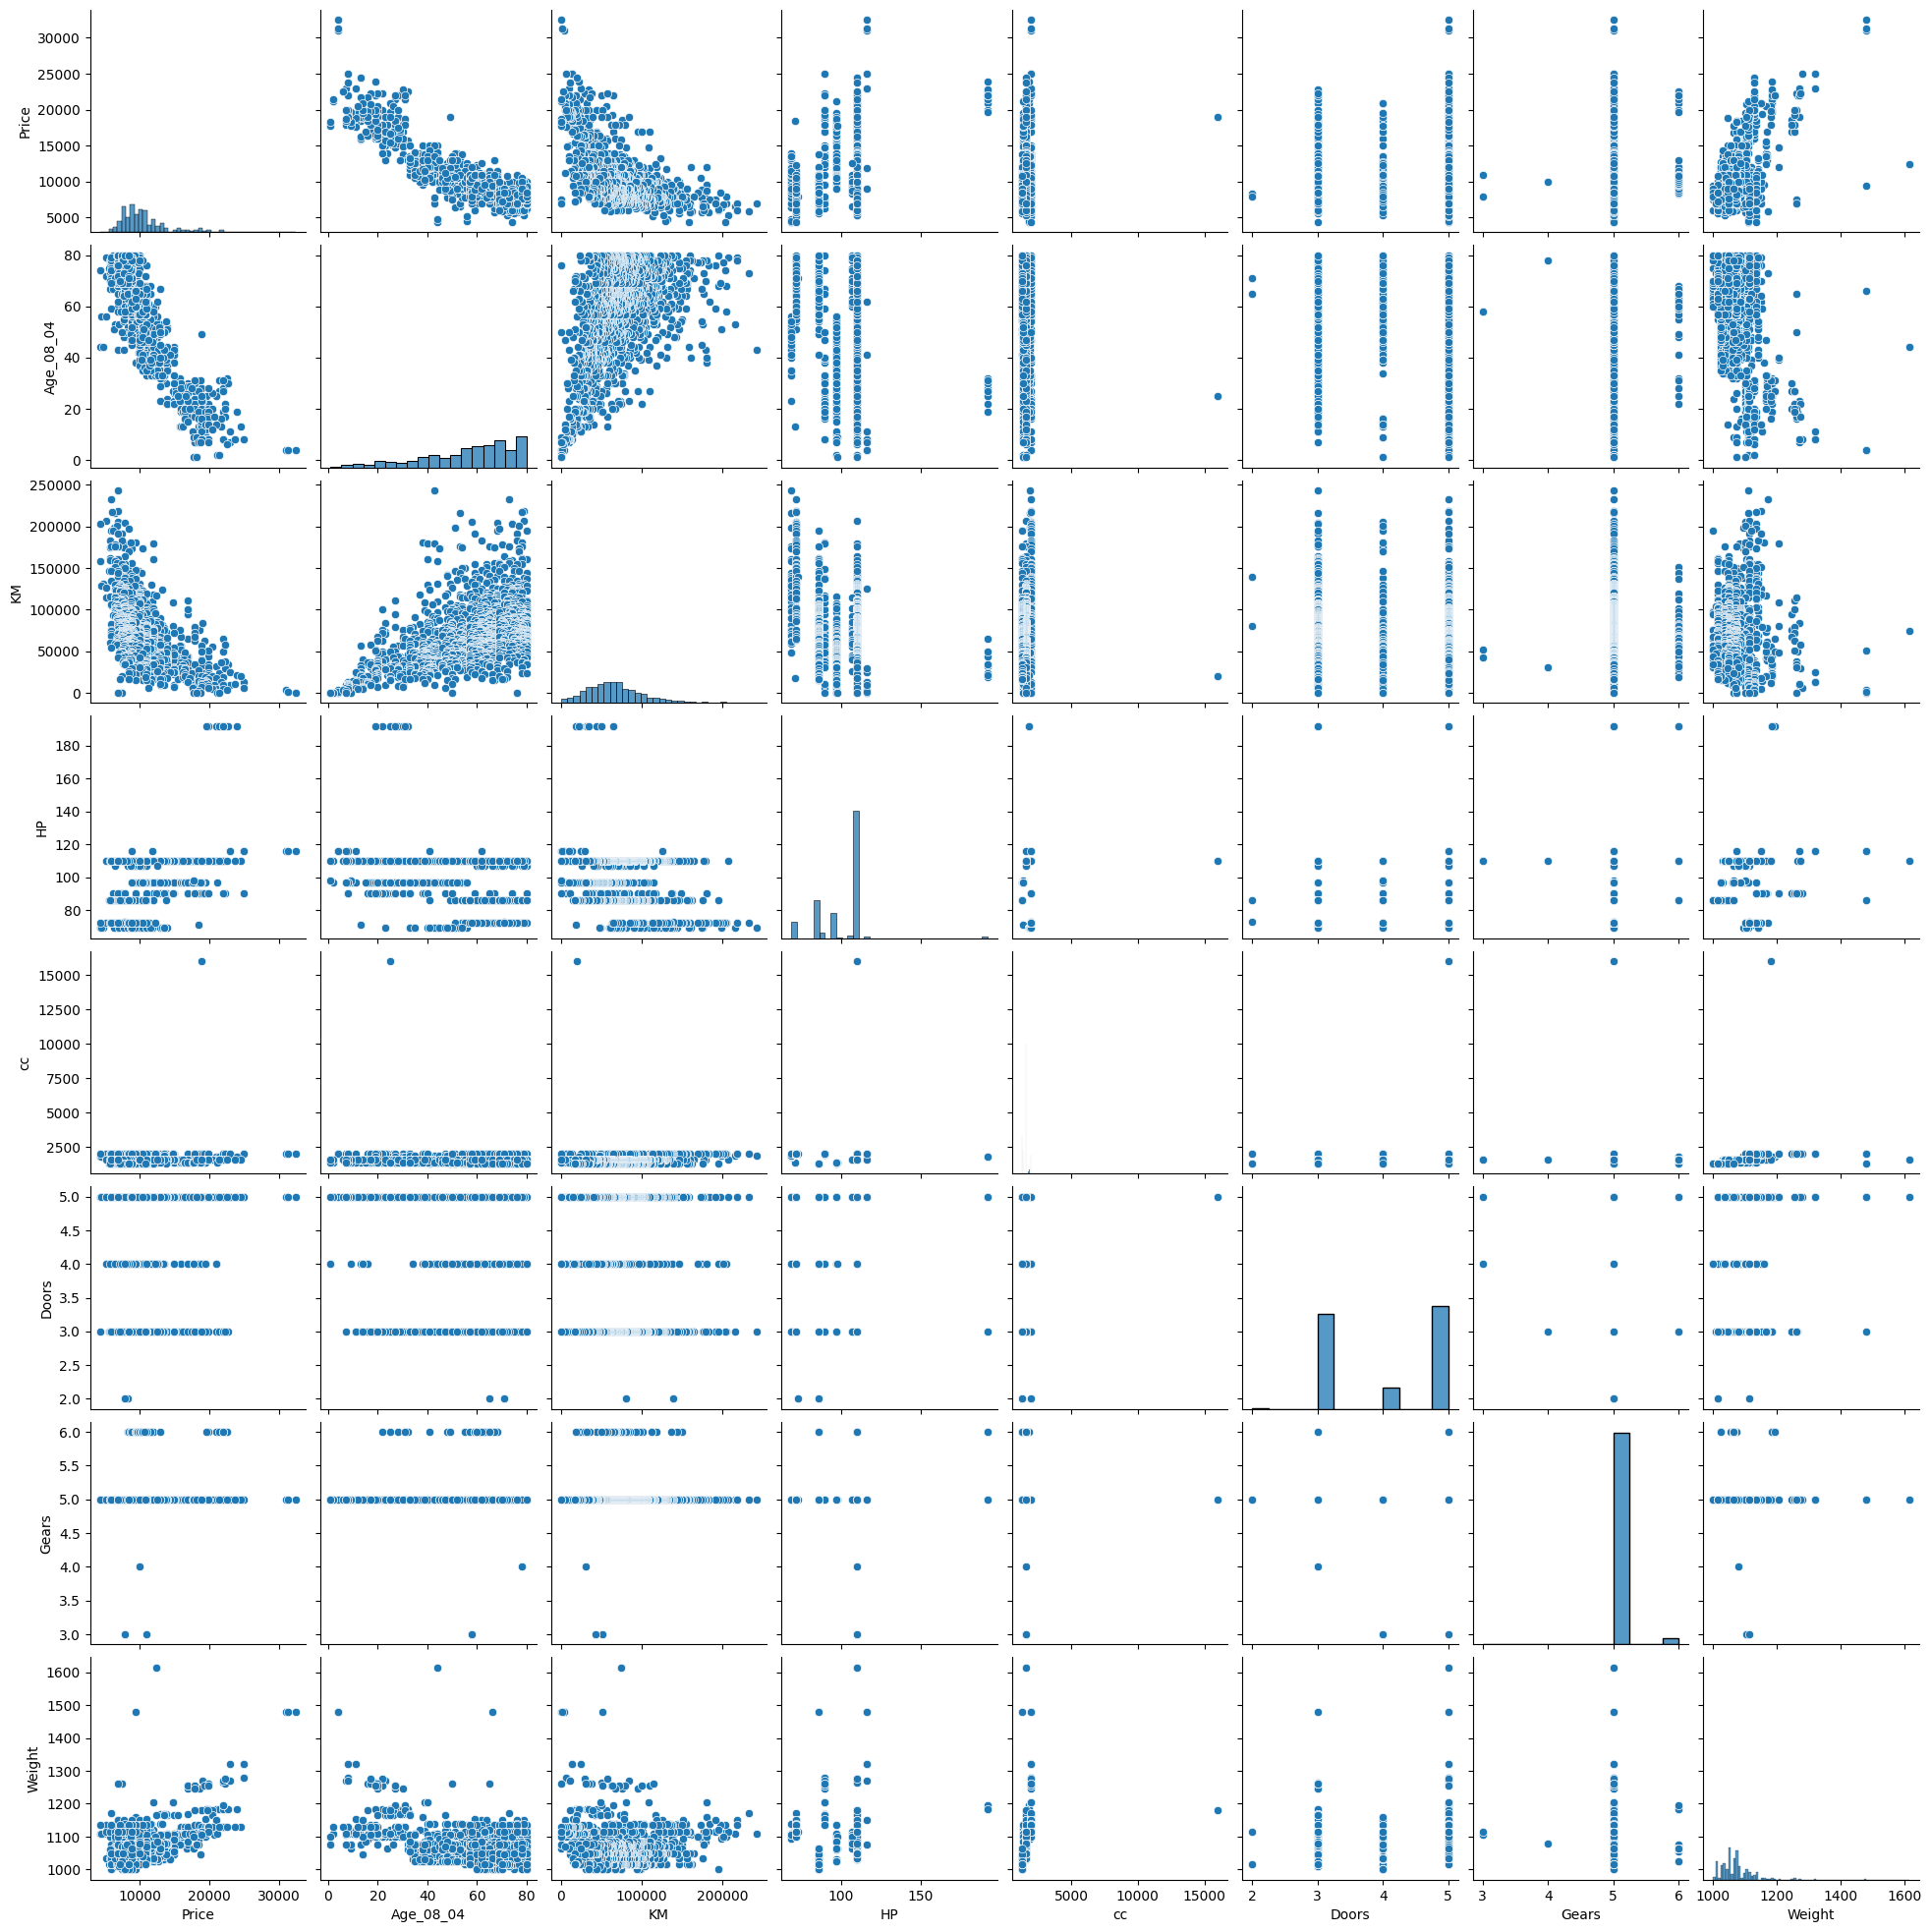

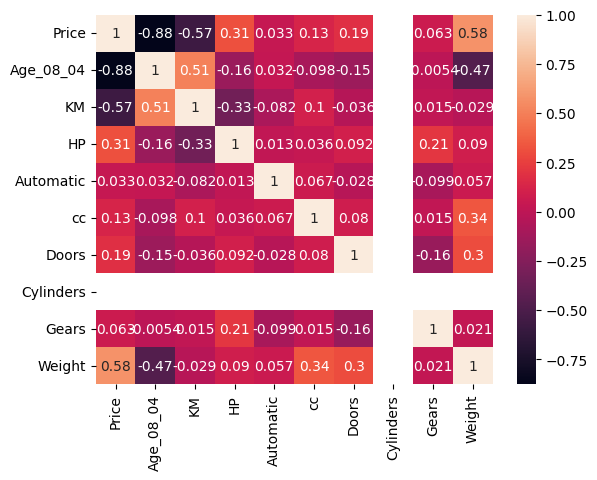

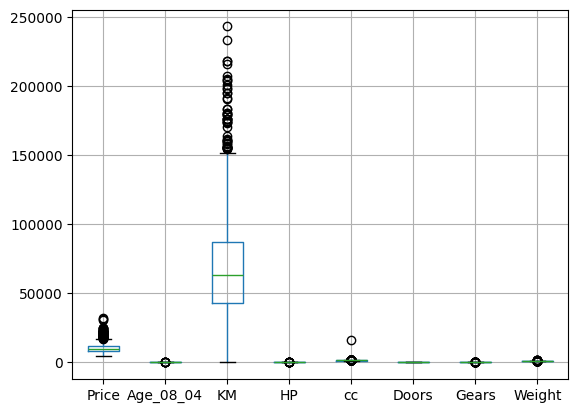

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

# Summary statistics
print(cars.describe())

# Visualizations
# Histograms for numerical features
cars.hist(figsize=(12, 12))
plt.show()

# Scatter plots for relationships between variables
sns.pairplot(cars[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight']])
plt.show()

# Correlation matrix
numerical_cars = cars.select_dtypes(include=np.number)
corr_matrix = numerical_cars.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Check for outliers using box plots
cars.boxplot(column=['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight'])
plt.show()


# Preprocessing (example: handling outliers)

# Example: Removing outliers for 'Price' using IQR method
Q1 = cars['Price'].quantile(0.25)
Q3 = cars['Price'].quantile(0.75)
IQR = Q3 - Q1
cars = cars[(cars['Price'] >= Q1 - 1.5 * IQR) & (cars['Price'] <= Q3 + 1.5 * IQR)]

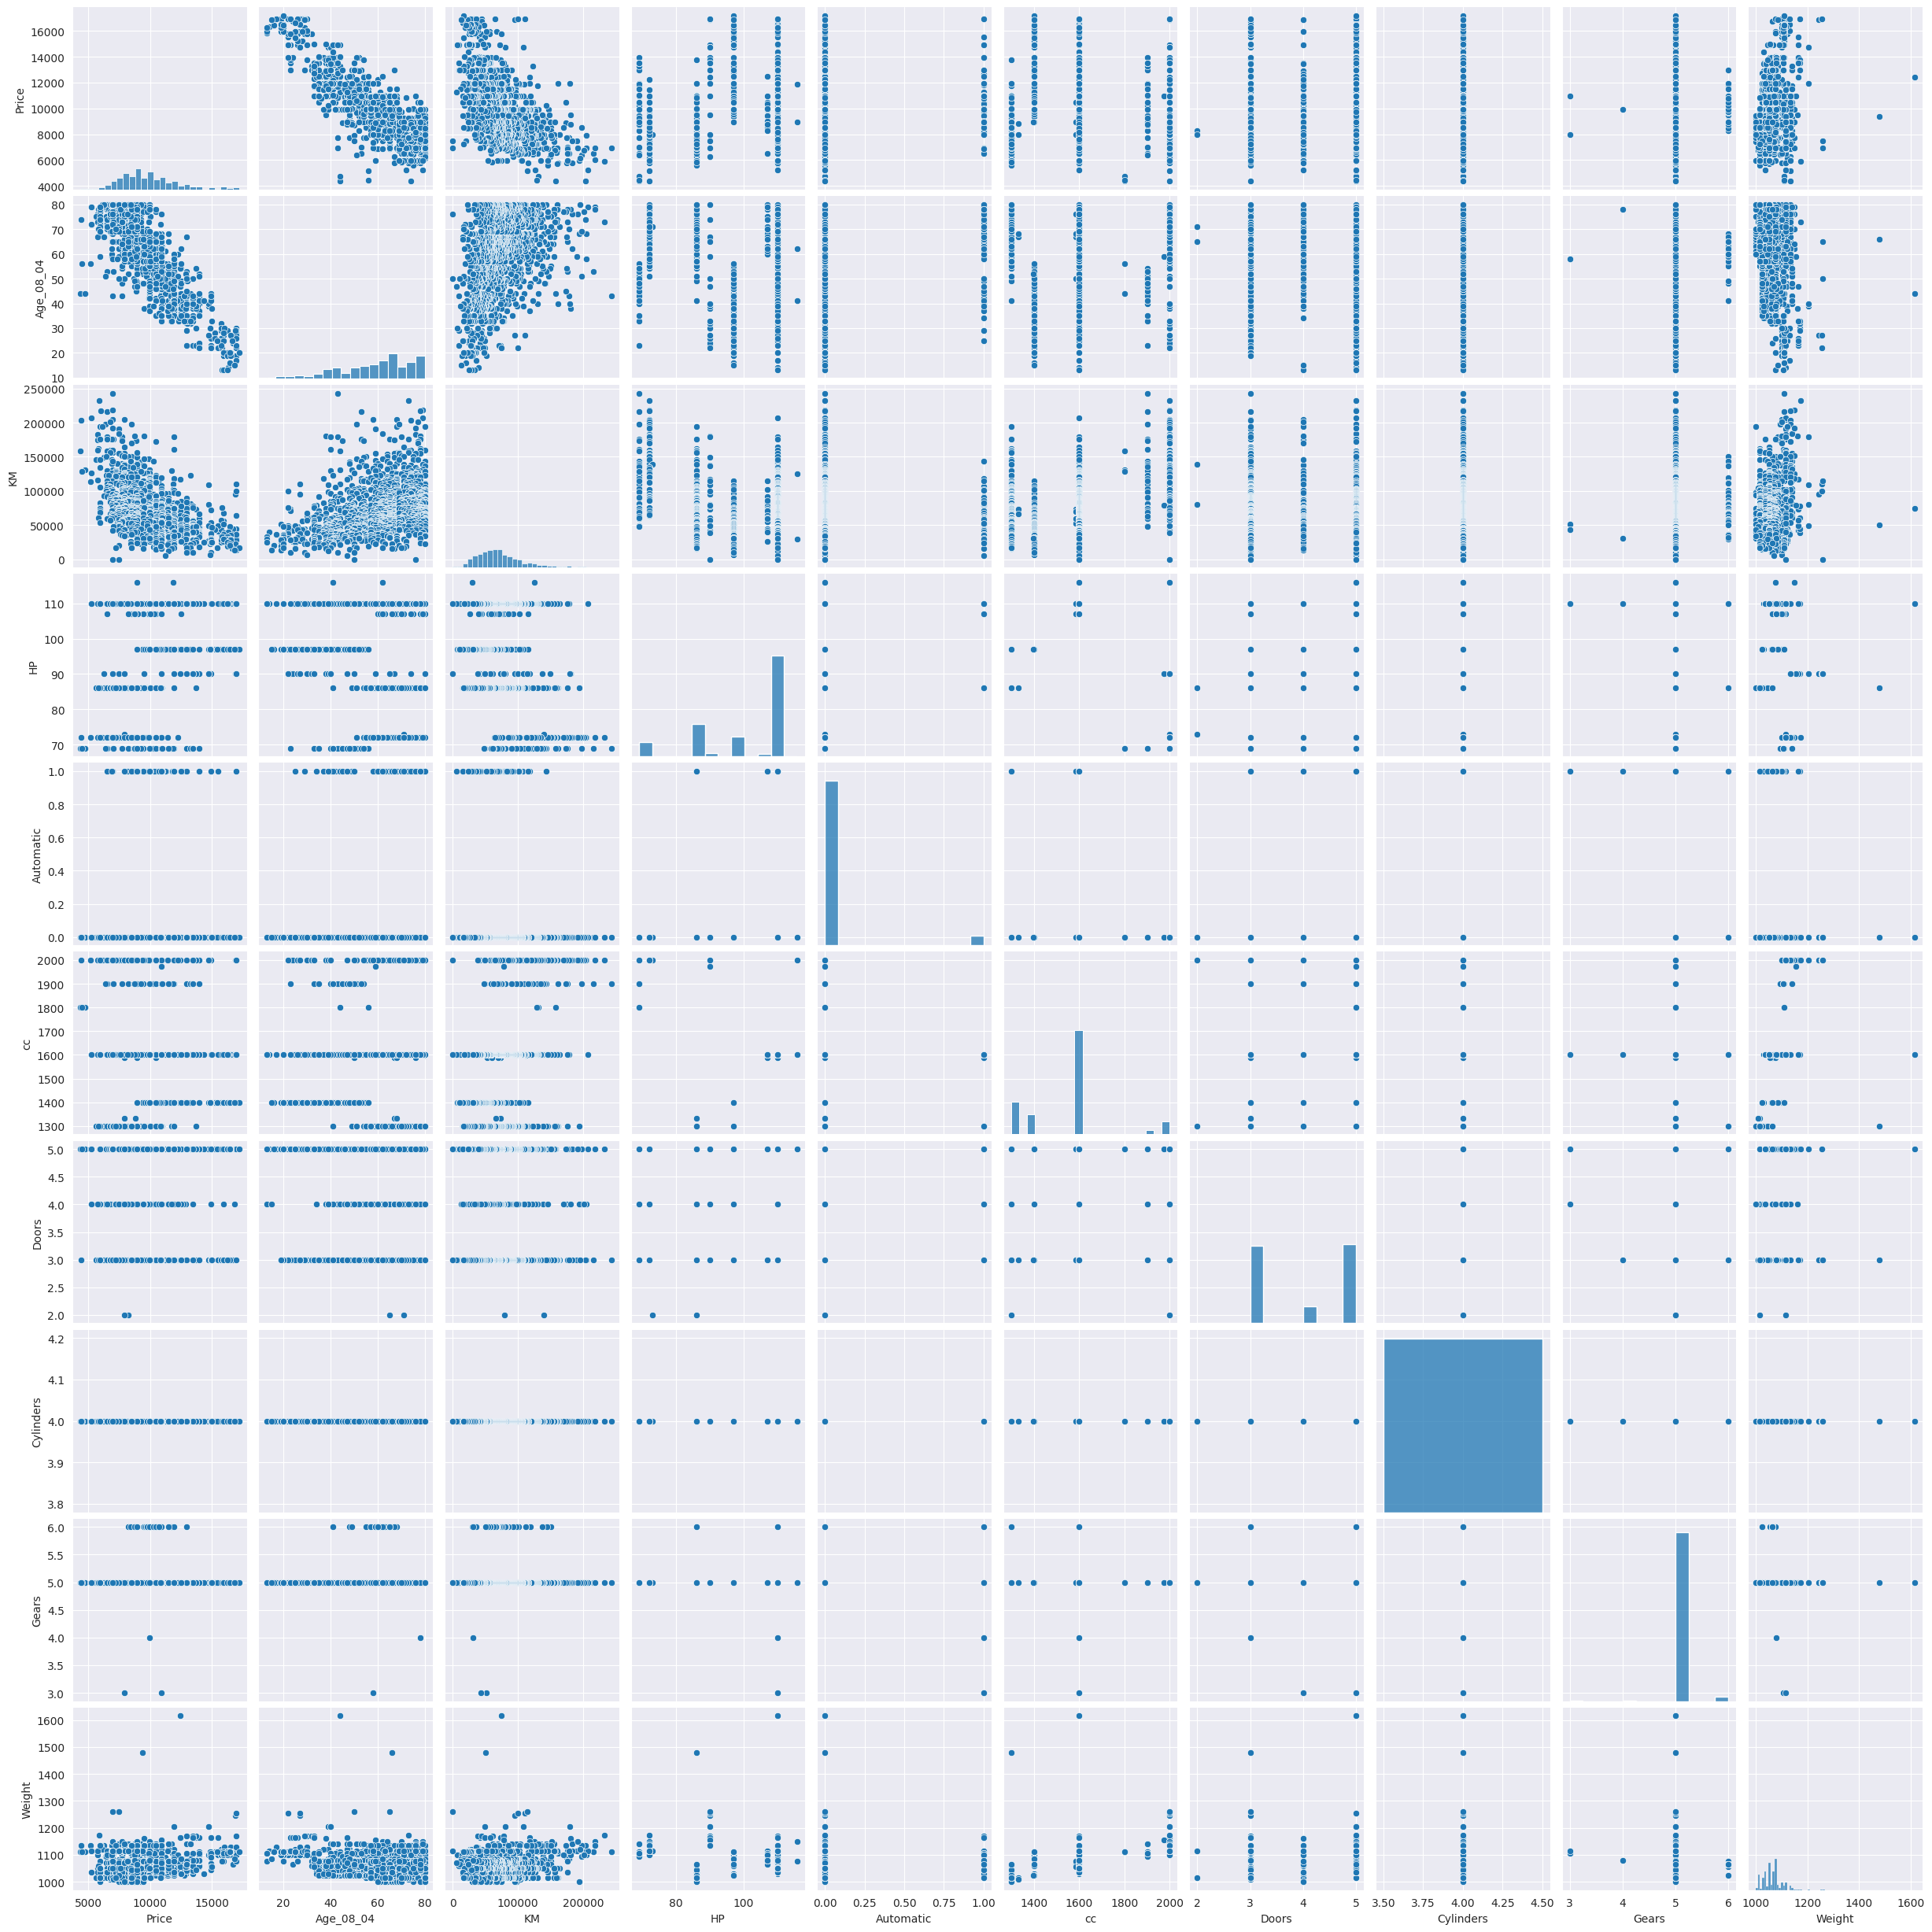

In [9]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [10]:
from sklearn.model_selection import train_test_split

X = cars[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight']]
y = cars['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
import statsmodels.formula.api as smf

# Model 1: All features
model1 = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Weight', data=cars).fit()
print(model1.summary())

# Model 2: Selected features (example)
model2 = smf.ols('Price ~ Age_08_04 + KM + HP + Weight', data=cars).fit()
print(model2.summary())

# Model 3: Interaction terms (example)
model3 = smf.ols('Price ~ Age_08_04 * KM + HP + Weight', data=cars).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     687.6
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:02:01   Log-Likelihood:                -11163.
No. Observations:                1326   AIC:                         2.234e+04
Df Residuals:                    1318   BIC:                         2.238e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3135.1764   1325.158      2.366      0.0

In [12]:
from sklearn.metrics import r2_score, mean_squared_error

# Get predictions for the test set
y_pred = model1.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared: 0.797880855894884
Mean Squared Error (MSE): 1153018.9999885699
Root Mean Squared Error (RMSE): 1073.7872228652052


In [1]:
!pip install scikit-learn==1.3.0

In [13]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Lasso and Ridge
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create Lasso and Ridge models
lasso = Lasso()
ridge = Ridge()

# Perform Grid Search to find the best alpha value for Lasso
lasso_grid = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)

# Perform Grid Search to find the best alpha value for Ridge
ridge_grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)

# Print the best alpha values and the corresponding scores
print(f"Best alpha for Lasso: {lasso_grid.best_params_['alpha']}")
print(f"Best score for Lasso: {lasso_grid.best_score_}")
print(f"Best alpha for Ridge: {ridge_grid.best_params_['alpha']}")
print(f"Best score for Ridge: {ridge_grid.best_score_}")

# Get the best Lasso and Ridge models
best_lasso_model = lasso_grid.best_estimator_
best_ridge_model = ridge_grid.best_estimator_

# Now you can use these models for prediction and evaluation

Best alpha for Lasso: 0.001
Best score for Lasso: -1275805.6424669903
Best alpha for Ridge: 1
Best score for Ridge: -1275747.7538872764
